 Remember, probability is given by the area under the *PDF, not the value of the PDF.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The Normal PDF

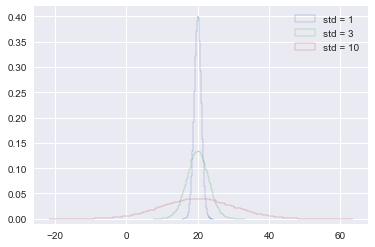

In [11]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,100000)
samples_std3=np.random.normal(20,3,100000)
samples_std10=np.random.normal(20,10,100000)


# Make histograms
plt.hist(samples_std1,bins=100,normed=True,histtype='step')
plt.hist(samples_std3,bins=100,normed=True,histtype='step')
plt.hist(samples_std10,bins=100,normed=True,histtype='step')


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


The Normal CDF

In [13]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

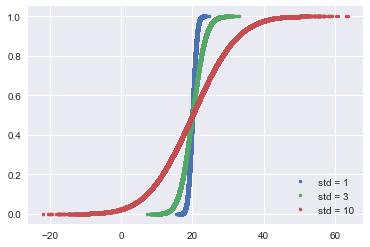

In [15]:
# Generate CDFs
x_std1,y_std1=ecdf(samples_std1)
x_std3,y_std3=ecdf(samples_std3)
x_std10,y_std10=ecdf(samples_std10)


# Plot CDFs
_=plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10,y_std10,marker='.',linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


Great work! The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

In [17]:
Are the Belmont Stakes results Normally distributed?

Object `distributed` not found.


In [ ]:
Are the Belmont Stakes results Normally distributed

In [21]:
belmont_no_outliers=np.array([150.6,150.2,149,148.4,149.6,148.2,148.82,148.74,152.2,150,150.8,149.8,149.6,146.8,146.4,
                             149.16,149.65,152.4,148.6,149.4,146.6,148.8,148.6,146,147.88,147.54,153.2,149.4,148.2,
                             150.2,147.2,149.8,147.2,151.19,151.57,152.8,149.6,150.2,148.4,148.8,149,148.1,146.56,
                             150.88,151.6,149.6,148.6,149.2,150.4,148.2,146.13,149.71,150.42,149.6,151,149,149.2,148,
                             147.8,149.97,148.26,150.7,152.8,149.2,150.2,148.8,149.2,147.2,146.82,147.5,148.52,152.6,
                             148.2,148.6,150.2,148.2,147,152.02,148.75,146.65,149.2,152.2,150.8,148.4,149,149.8,148.96,
                             147.86,148.51])




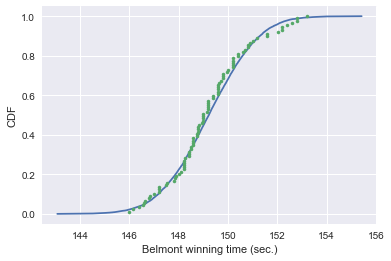

In [22]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


What are the chances of a horse matching or beating Secretariat's record?


Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [24]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu,sigma,1000000)

# Compute the fraction that are less than or equal to 144 seconds: prob
prob=np.sum(samples<=144)/1000000

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000621


In [26]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2,size)

    return t1 + t2


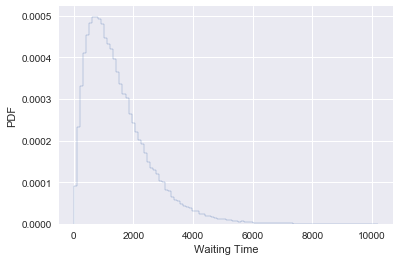

In [31]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,100000)

# Make the histogram
_=plt.hist(waiting_times,bins=100,normed=True,histtype='step')


# Label axes
_=plt.xlabel('Waiting Time')
_=plt.ylabel('PDF')


# Show the plot
plt.show()


